## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studyc = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
studyc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
studyc["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

print(studyc["Mouse ID"].value_counts())

g989    13
r701    10
c139    10
m546    10
c282    10
        ..
n482     1
o848     1
f932     1
d133     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

studyc
studydd = studyc.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
studydd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
studydd["Mouse ID"].value_counts()

r701    10
z581    10
m546    10
c282    10
c559    10
        ..
x226     1
d133     1
f932     1
h428     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
study_gb = studydd.groupby("Drug Regimen")
tum_mean = study_gb["Tumor Volume (mm3)"].mean()
tum_med = study_gb["Tumor Volume (mm3)"].median()
tum_var = study_gb["Tumor Volume (mm3)"].var()
tum_std = study_gb["Tumor Volume (mm3)"].std()
tum_sem = study_gb["Tumor Volume (mm3)"].sem()

tum_mean = pd.Series((tum_mean), name="Tumor Mean")
tum_med = pd.Series((tum_med), name="Tumor Median")
tum_var = pd.Series((tum_var), name="Tumor Variance")
tum_std = pd.Series((tum_std), name="Tumor Std")
tum_sem = pd.Series((tum_sem), name="Tumor SEM")

sum_df = pd.concat([tum_mean, tum_med, tum_var, tum_std, tum_sem], axis=1)
sum_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

              Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen                                                          
Capomulin            351         503          0         1125.000000   
Ceftamin             320         685          0         1125.000000   
Infubinol            410         683          0         1125.000000   
Ketapril             368         702          0         1125.000000   
Naftisol             306         681          0         1125.000000   
Placebo              267         701          0         1125.000000   
Propriva             247         681         25         1136.045564   
Ramicane             271         500          0         1125.000000   
Stelasyn             315         669          0         1080.000000   
Zoniferol            315         698          0         1125.000000   

              Metastatic Sites  Count  
Drug Regimen                           
Capomulin                    0     25  
Ceftamin                   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of Mice')

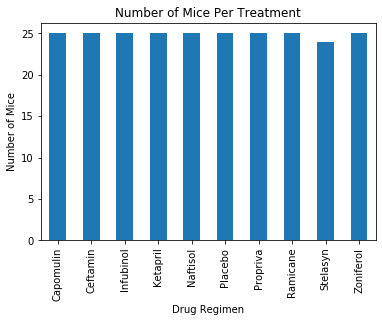

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

studydd
studyddd = studydd.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='first')
#study_bar = studyddd.set_index("Drug Regimen")
studyddd["Count"] = studyddd["Count"] = 1
study_bargb = studyddd.groupby("Drug Regimen")
study_bar = study_bargb.sum()
print(study_bar)
study_bar["Count"].plot(kind="bar")
plt.title("Number of Mice Per Treatment")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

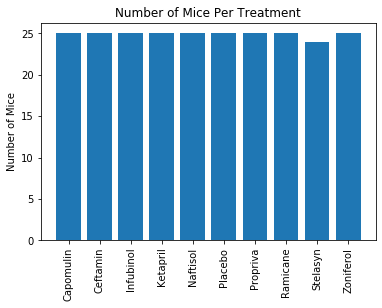

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import numpy as np
mice = study_bar["Count"]
x_axis = np.arange(len(mice))
drug = study_bar["Count"].index

plt.bar(x_axis, mice)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation="vertical")
plt.title("Number of Mice Per Treatment")
plt.ylabel("Number of Mice")

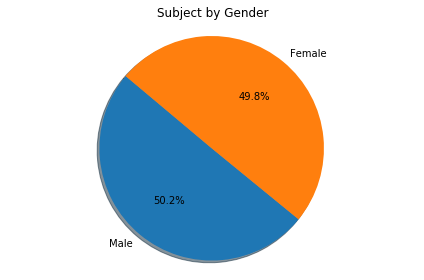

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

studyddd
gender = studyddd["Sex"].value_counts()
genderlist = gender.keys()
study_pie = gender.plot(kind="pie", y=genderlist, title=("Subject by Gender"), shadow=True, startangle=140,autopct="%1.1f%%")
plt.ylabel("")
plt.tight_layout()
plt.axis("equal")
study_pie

(-1.1092527659968812,
 1.1222566193373384,
 -1.109449931456455,
 1.1211462801337193)

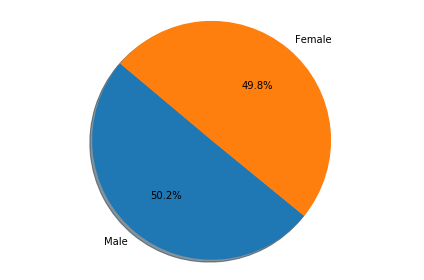

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender, labels=genderlist,autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
studydd
study_ft = studydd.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='last')
study_de = study_ft.set_index("Drug Regimen")
study_ft4 = study_de.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
study_ft4

# Merge this group df with the original dataframeCapomulin", "Ramicane", "Infubinol", "Ceftamin to get the tumor volume at the last timepoint


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,u364,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...
Ceftamin,x226,Male,23,28,0,45.000000,0
Ceftamin,x581,Female,19,28,45,64.634949,3
Ceftamin,x822,Male,3,29,45,61.386660,3


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
{'whiskers': [<matplotlib.lines.Line2D object at 0x0000020273E7F988>, <matplotlib.lines.Line2D object at 0x0000020273E7F148>], 'caps': [<matplotlib.lines.Line2D object at 0x0000020273E9B548>, <matplotlib.lines.Line2D object at 0x0000020273E9BA08>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000020273E7FE08>], 'medians': [<matplotlib.lines.Line2D object at 0x0000020273E6E748>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000020273E6EA88>], 'means': []}


Drug Regimen
Capomulin    23.343598
Capomulin    28.484033
Capomulin    28.430964
Capomulin    30.485985
Capomulin    31.023923
Capomulin    31.896238
Capomulin    32.377357
Capomulin    33.329098
Capomulin    34.455298
Capomulin    37.311846
Capomulin    36.041047
Capomulin    37.074024
Capomulin    38.846876
Capomulin    38.939633
Capomulin    38.982878
Capomulin    38.753265
Capomulin    38.125164
Capomulin    39.952347
Capomulin    40.658124
Capomulin    40.159220
Capomulin    40.728578
Capomulin    41.483008
Capomulin    41.581521
Capomulin    47.685963
Capomulin    46.539206
Name: Tumor Volume (mm3), dtype: float64

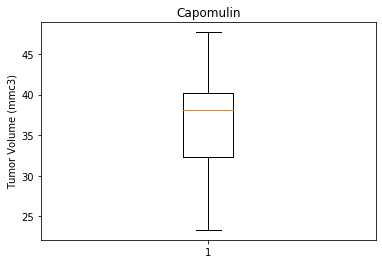

In [120]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumorv = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

study_cap = study_de.loc[["Capomulin"]]
study_ram = study_de.loc[["Ramicane"]]
study_inf = study_de.loc[["Infubinol"]]
study_cef = study_de.loc[["Ceftamin"]]

study_4treat = study_ft4['Tumor Volume (mm3)']

cap_tum = study_cap['Tumor Volume (mm3)']
cap_quartiles = cap_tum.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-ca_lowerq

print(f"The lower quartile of Capomulin is: {cap_lowerq}")
print(f"The upper quartile of Capomulin is: {cap_upperq}")
print(f"The interquartile range of Capomulin is: {cap_iqr}")
print(f"The the median of Capomulin is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {ca_lower_bound} could be outliers.")
print(f"Values above {ca_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mmc3)')
print(ax1.boxplot(cap_tum))
cap_tum



    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Infubinol is: 31.56046955
The upper quartile of Infubinol is: 40.65900627
The interquartile range of Infubinol is: 9.098536719999998
The the median of Infubinol is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Drug Regimen
Ramicane    22.050126
Ramicane    29.128472
Ramicane    30.276232
Ramicane    30.564625
Ramicane    30.638696
Ramicane    31.560470
Ramicane    31.095335
Ramicane    33.397653
Ramicane    32.978522
Ramicane    33.562402
Ramicane    36.134852
Ramicane    38.810366
Ramicane    37.225650
Ramicane    36.374510
Ramicane    36.561652
Ramicane    37.311236
Ramicane    38.342008
Ramicane    38.407618
Ramicane    40.659006
Ramicane    40.667713
Ramicane    45.220869
Ramicane    43.047543
Ramicane    43.419381
Ramicane    43.166373
Ramicane    44.183451
Name: Tumor Volume (mm3), dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x2027410f348>,
 'caps': [<matplotlib.lines.Line2D at 0x2027410fa88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20274109cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x202741167c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20274116f88>],
 'means': []}

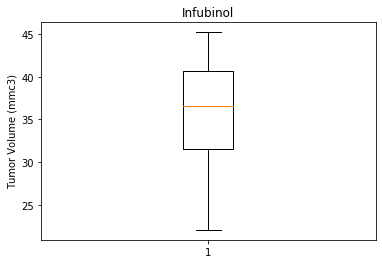

In [105]:
ram_tum = study_ram['Tumor Volume (mm3)']
ram_quartiles = ram_tum.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of Ramicane" is: {ram_lowerq}")
print(f"The upper quartile of Ramicane" is: {ram_upperq}")
print(f"The interquartile range of Ramicane" is: {ram_iqr}")
print(f"The the median of Ramicane" is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane"')
ax1.set_ylabel('Tumor Volume (mmc3)')
print(ram_tum)
ax1.boxplot(ram_tum)

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Drug Regimen
Infubinol    67.973419
Infubinol    65.525743
Infubinol    57.031862
Infubinol    66.083066
Infubinol    72.226731
Infubinol    36.321346
Infubinol    60.969711
Infubinol    62.435404
Infubinol    60.918767
Infubinol    67.289621
Infubinol    66.196912
Infubinol    62.117279
Infubinol    47.010364
Infubinol    60.165180
Infubinol    55.629428
Infubinol    45.699331
Infubinol    54.656549
Infubinol    55.650681
Infubinol    46.250112
Infubinol    54.048608
Infubinol    51.542431
Infubinol    50.005138
Infubinol    58.268442
Infubinol    67.685569
Infubinol    62.754451
Name: Tumor Volume (mm3), dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x2027417a388>,
 'caps': [<matplotlib.lines.Line2D at 0x2027417aac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20274172d08>],
 'medians': [<matplotlib.lines.Line2D at 0x2027417e708>],
 'fliers': [<matplotlib.lines.Line2D at 0x2027417eec8>],
 'means': []}

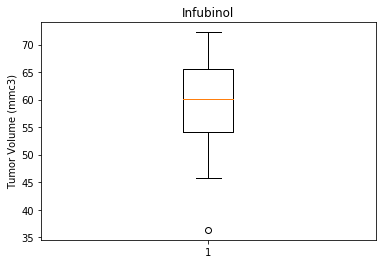

In [106]:
inf_tum = study_inf['Tumor Volume (mm3)']
inf_quartiles = inf_tum.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of Infubinol is: {inf_lowerq}")
print(f"The upper quartile of Infubinol is: {inf_upperq}")
print(f"The interquartile range of Infubinol is: {inf_iqr}")
print(f"The the median of Infubinol is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Tumor Volume (mmc3)')
print(inf_tum)
ax1.boxplot(inf_tum)

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Drug Regimen
Ceftamin    62.999356
Ceftamin    45.000000
Ceftamin    56.057749
Ceftamin    55.742829
Ceftamin    48.722078
Ceftamin    47.784682
Ceftamin    61.849023
Ceftamin    68.923185
Ceftamin    67.748662
Ceftamin    57.918381
Ceftamin    46.784535
Ceftamin    59.851956
Ceftamin    64.299830
Ceftamin    59.741901
Ceftamin    61.433892
Ceftamin    64.192341
Ceftamin    45.000000
Ceftamin    52.925348
Ceftamin    45.000000
Ceftamin    67.527482
Ceftamin    45.000000
Ceftamin    64.634949
Ceftamin    61.386660
Ceftamin    68.594745
Ceftamin    64.729837
Name: Tumor Volume (mm3), dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x202741f8f08>,
 'caps': [<matplotlib.lines.Line2D at 0x202741fc748>,
 'boxes': [<matplotlib.lines.Line2D at 0x202741f8908>],
 'medians': [<matplotlib.lines.Line2D at 0x202741fce88>],
 'fliers': [<matplotlib.lines.Line2D at 0x202742007c8>],
 'means': []}

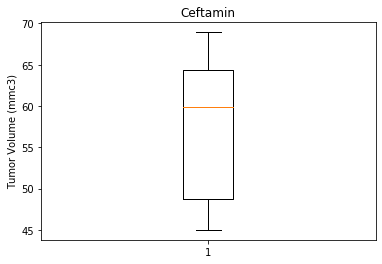

In [108]:
cef_tum = study_cef['Tumor Volume (mm3)']
cef_quartiles = cef_tum.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"The lower quartile of Ceftamin is: {cef_lowerq}")
print(f"The upper quartile of Ceftamin is: {cef_upperq}")
print(f"The interquartile range of Ceftamin is: {cef_iqr}")
print(f"The the median of Ceftamin is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume (mmc3)')
print(cef_tum)
ax1.boxplot(cef_tum)

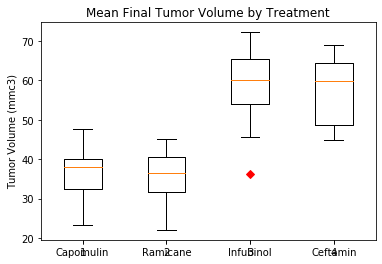

In [245]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title('Mean Final Tumor Volume by Treatment')
ax1.set_ylabel('Tumor Volume (mmc3)')
plt.xticks([1,2,3,4], treatment)
ax1.boxplot([cap_tum, ram_tum, inf_tum, cef_tum], 0, 'rD')
plt.show()

## Line and Scatter Plots

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876
25,33.949940
30,32.959671
35,28.328531
40,25.472143


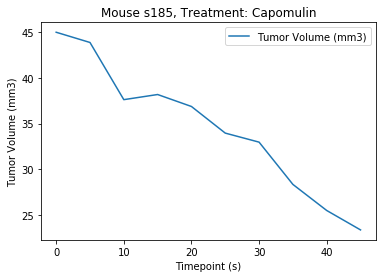

In [152]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
studydd
studymouse = studydd.set_index("Mouse ID")
studymouse.head(30)
mouse_s185 = studymouse.loc["s185"]
mouse_s185_line = mouse_s185[["Timepoint", "Tumor Volume (mm3)"]]
mouse_s185_line = mouse_s185_line.set_index("Timepoint") 

mouse_s185_line.plot(kind="line")
plt.title("Mouse s185, Treatment: Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (s)")
mouse_s185_line

Text(0, 0.5, 'Mean Tumor Volume (mmc)')

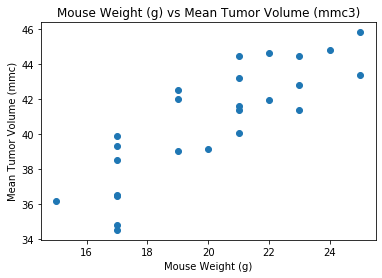

In [186]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

studydd
studyscatter = studydd.set_index("Drug Regimen")
studyscatter.head(30)
scattercap = studyscatter.loc["Capomulin"]
scattercap_gb = scattercap.groupby("Mouse ID")
scattercap_gb_sort = scattercap_gb.mean()
scattercap_gb_sort = scattercap_gb_sort[["Weight (g)", "Tumor Volume (mm3)"]]
scattercap_gb_sort = scattercap_gb_sort.rename(columns={"Tumor Volume (mm3)" : "Mean Tumor Volum (mm3)"})
weight = scattercap_gb_sort["Weight (g)"]
m_tumor = scattercap_gb_sort["Mean Tumor Volum (mm3)"]
plt.scatter(weight, m_tumor)

plt.title("Mouse Weight (g) vs Mean Tumor Volume (mmc3)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mmc)")


## Correlation and Regression

R value =  0.8419363424694718
Rsquared =  0.7088568047708717
p value = 1.3225722434712642e-07 , significant at the alpha of .05


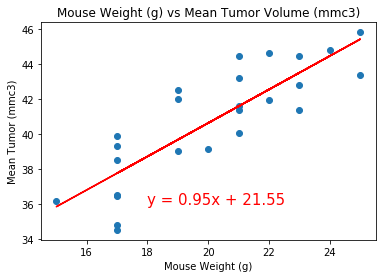

In [211]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, m_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, m_tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mean Tumor (mmc3)')    
plt.title("Mouse Weight (g) vs Mean Tumor Volume (mmc3)")
print("R value = ", rvalue)
print("Rsquared = ", rvalue*rvalue)
print("p value =", pvalue, ", significant at the alpha of .05")